In [1]:
#https://machinelearningmastery.com/make-predictions-time-series-forecasting-python/

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.arima_model import ARIMA
import seaborn as sns
from statsmodels.tsa.ar_model import AutoReg
from math import sqrt

In [3]:
data = pd.read_excel('Multiplos_Walmex_2022.xlsx',sheet_name=0)
data.set_index('Consolidado',inplace=True)
data

,Precio / Utilidad x,Precio / Valor Libro x,Price Sales Ratio x,Precio / EBITDA x,EV / EBITDA de la empr x,EV / Ventas x
Consolidado,,,,,,
2019-01-04,23.6,5.3,1.4,14.0,13.6,1.4
2019-01-11,22.9,5.1,1.4,13.6,13.2,1.3
2019-01-18,23.5,5.2,1.4,14.0,13.6,1.4
2019-01-25,22.7,5.1,1.4,13.5,13.1,1.3
2019-02-01,23.6,5.3,1.4,14.0,13.6,1.4
...,...,...,...,...,...,...
2022-03-04,30.0,7.1,1.8,16.3,15.8,1.7
2022-03-11,30.1,7.1,1.8,16.4,15.8,1.7
2022-03-18,30.7,7.3,1.8,16.7,16.2,1.8


# Funciones Auxiliares

In [4]:
# create a difference transform of the dataset
def difference(dataset):
	diff = list()
	for i in range(1, len(dataset)):
		value = dataset[i] - dataset[i - 1]
		diff.append(value)
	return np.array(diff)
 
# Make a prediction give regression coefficients and lag obs
def predict(coef, history):
	yhat = coef[0]
	for i in range(1, len(coef)):
		yhat += coef[i] * history[-i]
	return yhat

# Precio / Utilidad

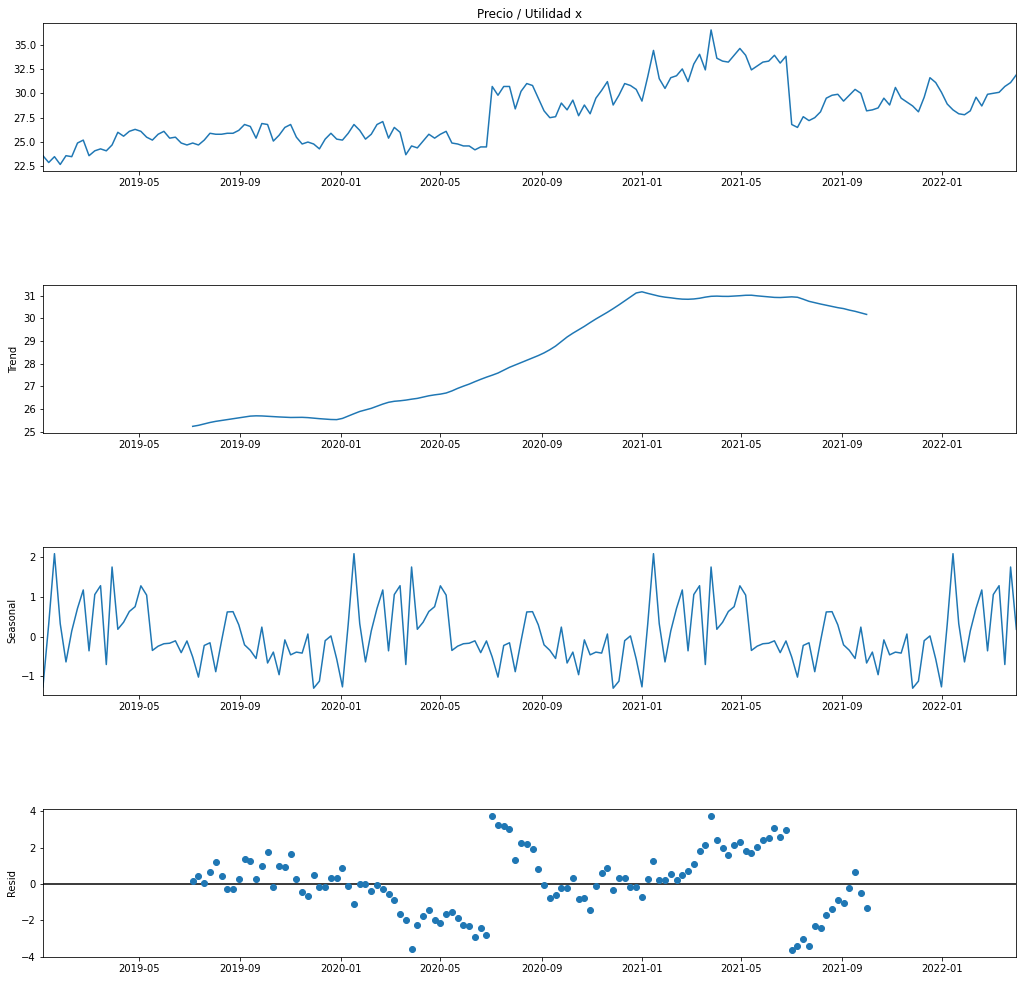

In [5]:
#Modelo aditivo
result = seasonal_decompose(data['Precio / Utilidad x'], model='additive')
fig = result.plot()
fig.set_size_inches((16, 16))
pyplot.show()

In [6]:
X = difference(data['Precio / Utilidad x'].values)
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:]

# train autoregression
window = 6
model = AutoReg(train, lags=6)
model_fit = model.fit()
coef = model_fit.params

# walk forward over time steps in test
history = [train[i] for i in range(len(train))]
predictions = list()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


In [7]:
num_pred = 20
for t in range(len(test) + num_pred):
    yhat = predict(coef,history)
    if t < len(test):
        obs = test[t]
    else:
        obs = yhat
    predictions.append(yhat)
    history.append(obs)

In [8]:
pred_extra = [data['Precio / Utilidad x'].iloc[-1]]
t = len(pred_extra) - 1
for j in range(num_pred):
    pred_extra.append(pred_extra[-1] + predictions[-10+j])
pred_extra.pop(0)
l = list(data['Precio / Utilidad x'].iloc[-58:].values + np.array(predictions[:-num_pred]))
pred_extra = l + pred_extra

pred_extra = np.array(pred_extra)
predicciones = pd.DataFrame(pred_extra)
from datetime import datetime, timedelta
fechas = list(data.reset_index().iloc[-58:,0])
for j in range(num_pred):
    fechas.append(fechas[-1] + timedelta(days=7))
fechas = pd.DataFrame(fechas, columns = ['Consolidado'])
predicciones = pd.concat([fechas,predicciones],axis=1)
predicciones

,Consolidado,0
0,2021-02-26,30.879180
1,2021-03-05,33.136846
2,2021-03-12,34.021732
3,2021-03-19,31.851545
4,2021-03-26,36.646563
...,...,...
73,2022-07-22,31.277882
74,2022-07-29,31.143359
75,2022-08-05,31.789615
76,2022-08-12,31.899137


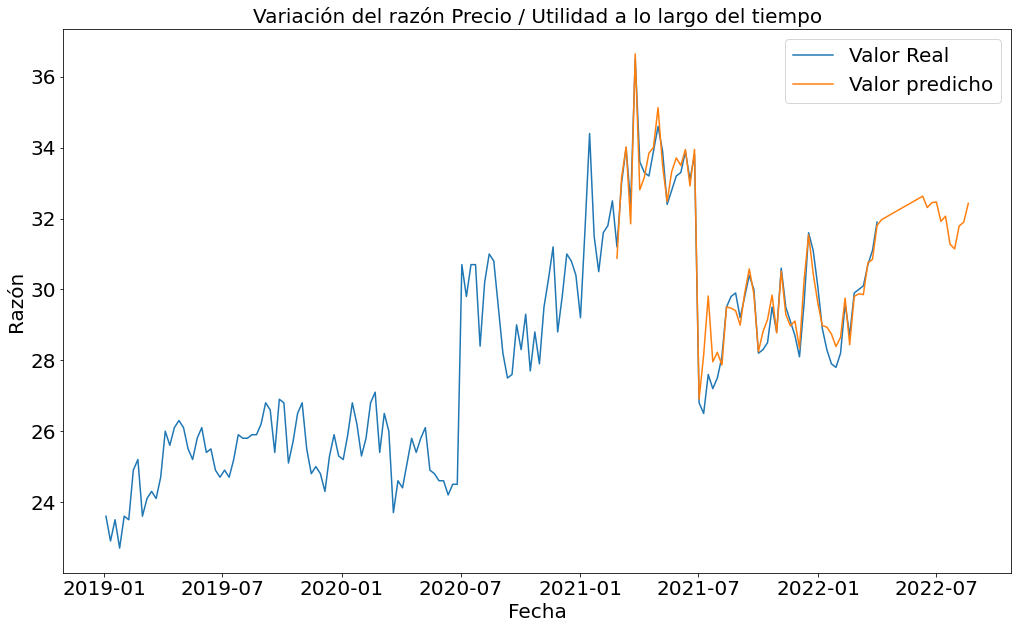

In [9]:
plt.figure(figsize=(17,10))
sns.lineplot(data=data,x="Consolidado",y="Precio / Utilidad x",label='Valor Real')
sns.lineplot(data=predicciones,x="Consolidado",y=0,label='Valor predicho')
plt.title('Variación del razón Precio / Utilidad a lo largo del tiempo', fontsize=20)
plt.legend(loc="upper right",fontsize=20)
plt.xlabel("Fecha",fontsize=20)
plt.ylabel("Razón",fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

# Precio / EBITDA

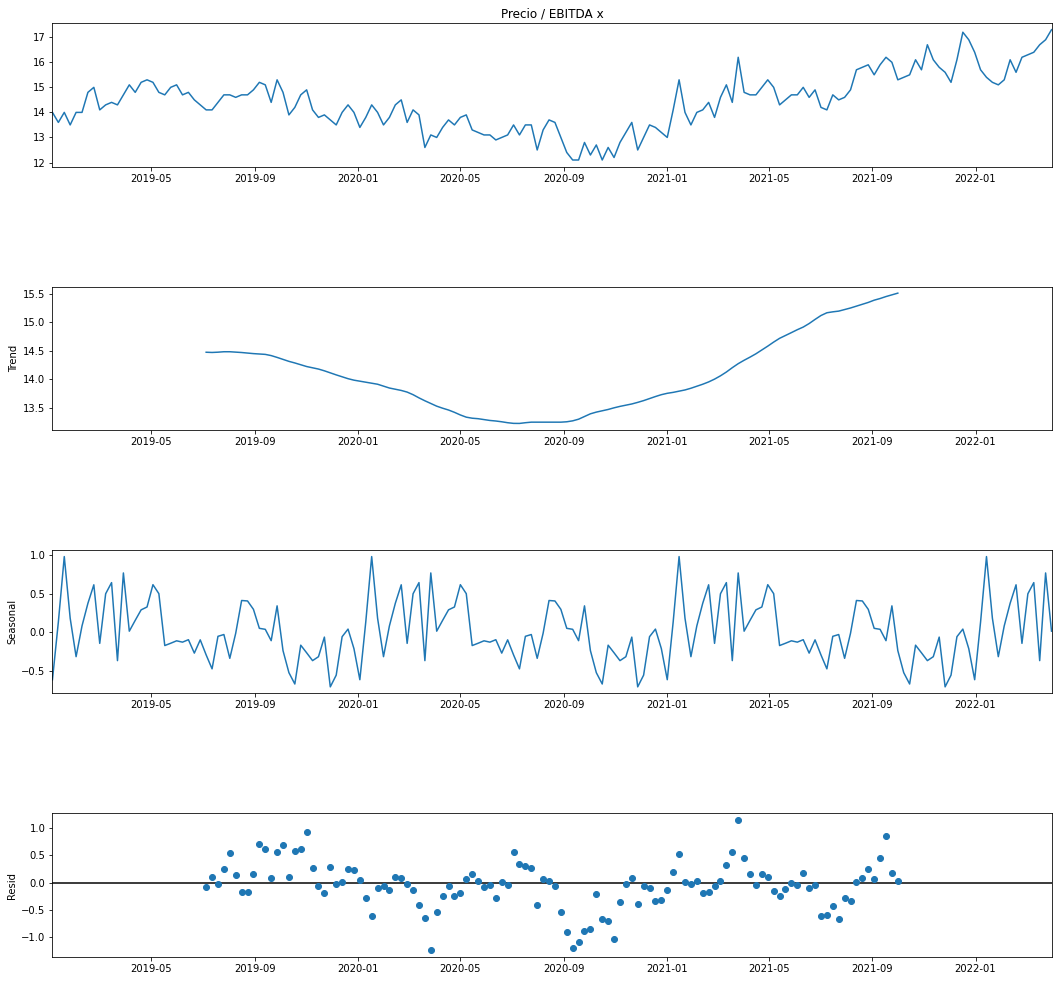

In [10]:
#Modelo aditivo
result = seasonal_decompose(data['Precio / EBITDA x'], model='additive')
fig = result.plot()
fig.set_size_inches((16, 16))
pyplot.show()

In [11]:
X = difference(data['Precio / EBITDA x'].values)
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:]

# train autoregression
window = 6
model = AutoReg(train, lags=6)
model_fit = model.fit()
coef = model_fit.params

# walk forward over time steps in test
history = [train[i] for i in range(len(train))]
predictions = list()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


In [12]:
num_pred = 20
for t in range(len(test) + num_pred):
    yhat = predict(coef,history)
    if t < len(test):
        obs = test[t]
    else:
        obs = yhat
    predictions.append(yhat)
    history.append(obs)

In [13]:
pred_extra = [data['Precio / EBITDA x'].iloc[-1]]
t = len(pred_extra) - 1
for j in range(num_pred):
    pred_extra.append(pred_extra[-1] + predictions[-10+j])
pred_extra.pop(0)
l = list(data['Precio / EBITDA x'].iloc[-58:].values + np.array(predictions[:-num_pred]))
pred_extra = l + pred_extra

pred_extra = np.array(pred_extra)
predicciones = pd.DataFrame(pred_extra)
from datetime import datetime, timedelta
fechas = list(data.reset_index().iloc[-58:,0])
for j in range(num_pred):
    fechas.append(fechas[-1] + timedelta(days=7))
fechas = pd.DataFrame(fechas, columns = ['Consolidado'])
predicciones = pd.concat([fechas,predicciones],axis=1)

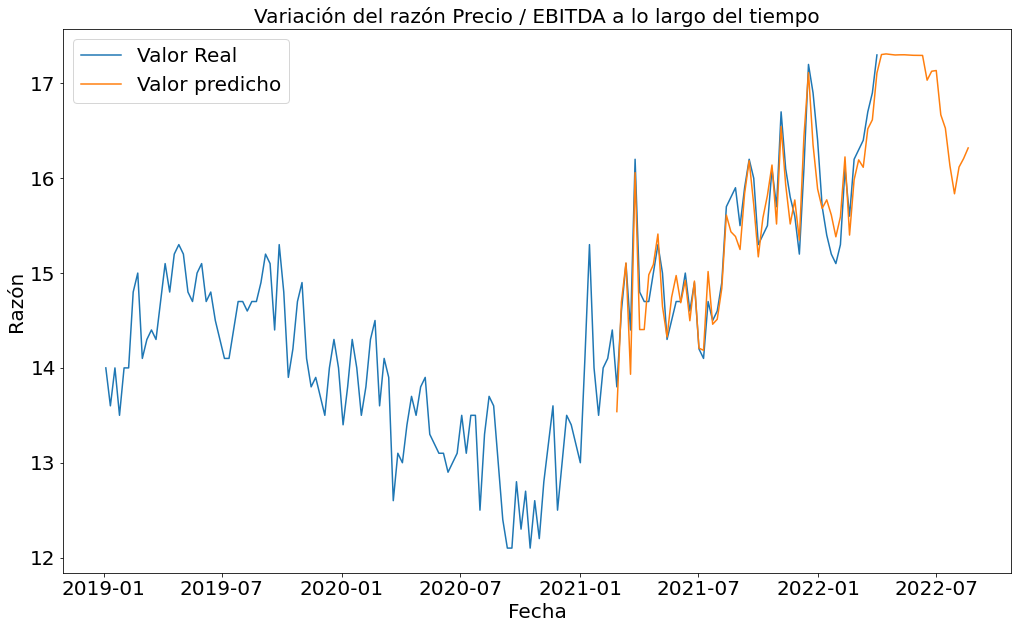

In [14]:
plt.figure(figsize=(17,10))
sns.lineplot(data=data,x="Consolidado",y="Precio / EBITDA x",label='Valor Real')
sns.lineplot(data=predicciones,x="Consolidado",y=0,label='Valor predicho')
plt.title('Variación del razón Precio / EBITDA a lo largo del tiempo', fontsize=20)
plt.legend(loc="upper left",fontsize=20)
plt.xlabel("Fecha",fontsize=20)
plt.ylabel("Razón",fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

# EV / Ventas

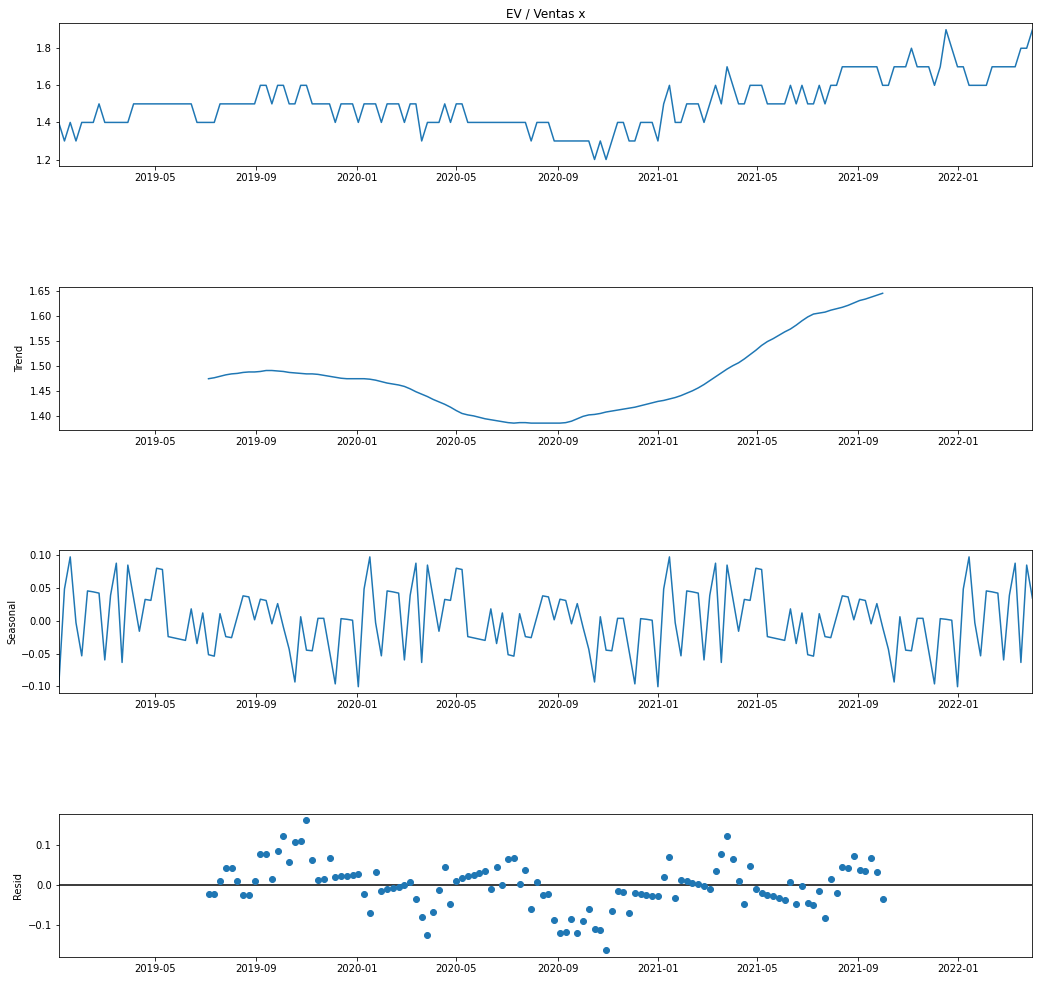

In [15]:
#Modelo aditivo
result = seasonal_decompose(data['EV / Ventas x'], model='additive')
fig = result.plot()
fig.set_size_inches((16, 16))
pyplot.show()

In [16]:
X = difference(data['EV / Ventas x'].values)
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:]

# train autoregression
window = 6
model = AutoReg(train, lags=6)
model_fit = model.fit()
coef = model_fit.params

# walk forward over time steps in test
history = [train[i] for i in range(len(train))]
predictions = list()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


In [17]:
num_pred = 20
for t in range(len(test) + num_pred):
    yhat = predict(coef,history)
    if t < len(test):
        obs = test[t]
    else:
        obs = yhat
    predictions.append(yhat)
    history.append(obs)

In [18]:
pred_extra = [data['EV / Ventas x'].iloc[-1]]
t = len(pred_extra) - 1
for j in range(num_pred):
    pred_extra.append(pred_extra[-1] + predictions[-10+j])
pred_extra.pop(0)
l = list(data['EV / Ventas x'].iloc[-58:].values + np.array(predictions[:-num_pred]))
pred_extra = l + pred_extra

pred_extra = np.array(pred_extra)
predicciones = pd.DataFrame(pred_extra)
from datetime import datetime, timedelta
fechas = list(data.reset_index().iloc[-58:,0])
for j in range(num_pred):
    fechas.append(fechas[-1] + timedelta(days=7))
fechas = pd.DataFrame(fechas, columns = ['Consolidado'])
predicciones = pd.concat([fechas,predicciones],axis=1)

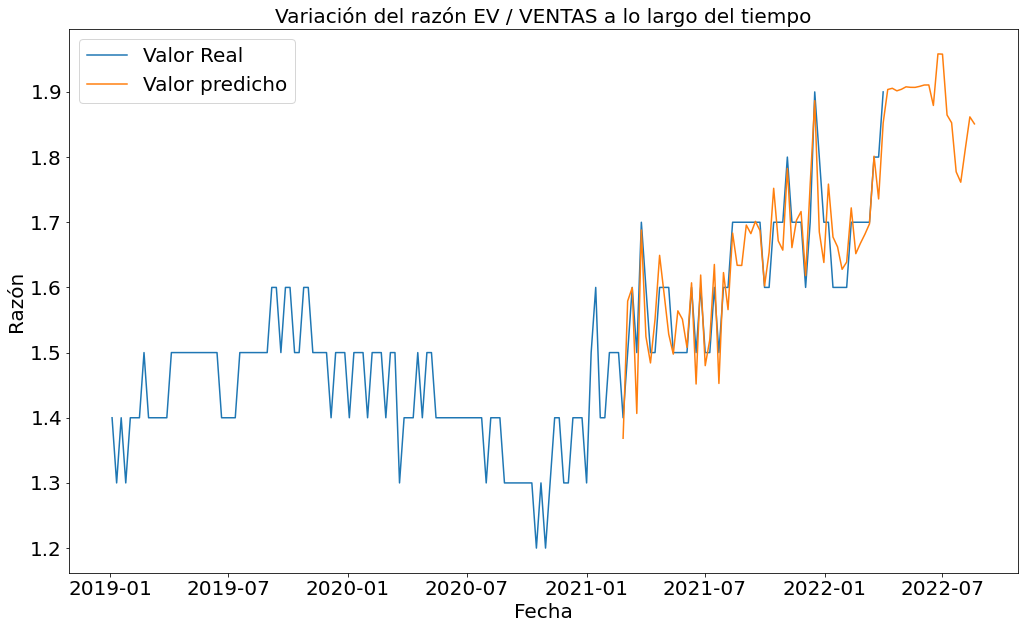

In [19]:
plt.figure(figsize=(17,10))
sns.lineplot(data=data,x="Consolidado",y="EV / Ventas x",label='Valor Real')
sns.lineplot(data=predicciones,x="Consolidado",y=0,label='Valor predicho')
plt.title('Variación del razón EV / VENTAS a lo largo del tiempo', fontsize=20)
plt.legend(loc="upper left",fontsize=20)
plt.xlabel("Fecha",fontsize=20)
plt.ylabel("Razón",fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()